<a href="https://colab.research.google.com/github/c04chd03/Hello-World-/blob/master/BUSI651_Final_project_David_Espinosa_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import required libararies**

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

**Load the Data:**
load the CIFAR-10 dataset using the Keras API.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 17s 0us/step


**Plot Random Images**

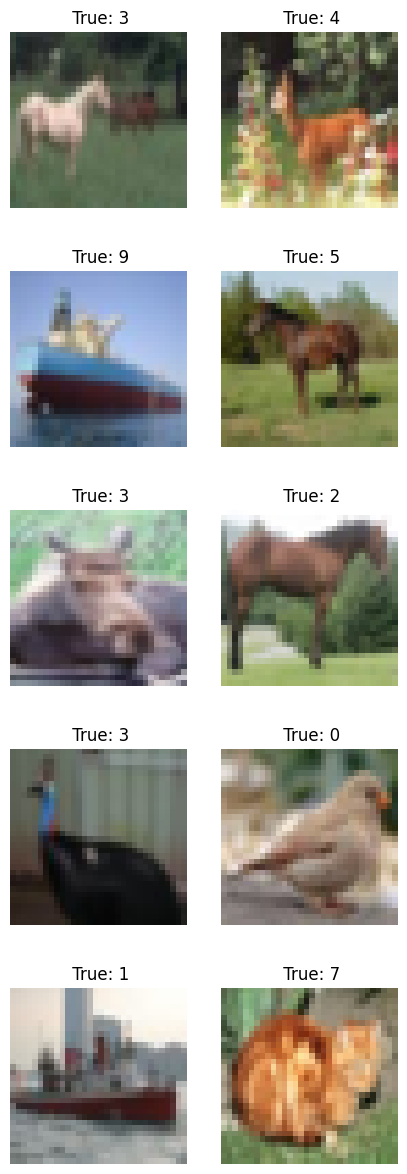

In [20]:
example_indices = np.random.choice(len(test_images), 10, replace=False)

# 1stPlot the example images with their predicted labels
plt.figure(figsize=(5, 15))
for i, example_index in enumerate(example_indices):
    example_image = train_images[example_index]
    true_label = test_labels[example_index][0]
    plt.subplot(5, 2, i+1)
    plt.imshow(example_image)
    plt.axis('off')
    plt.title(f" True: {true_label}")
plt.show()

# **Model Training:**

**Implement the ResNet architecture using Tensorflow.**
Train the ResNet model on the preprocessed CIFAR-10 dataset.

In [5]:
class ResNet(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = layers.Conv2D(64, (3, 3), padding='same', input_shape=train_images.shape[1:])
        self.bn1 = layers.BatchNormalization()
        self.layer1 = tf.keras.Sequential([
            ResidualBlock(64, 64),
            ResidualBlock(64, 64),
            ResidualBlock(64, 64)
        ])
        self.layer2 = tf.keras.Sequential([
            ResidualBlock(64, 128, stride=2),
            ResidualBlock(128, 128),
            ResidualBlock(128, 128)
        ])
        self.layer3 = tf.keras.Sequential([
            ResidualBlock(128, 256, stride=2),
            ResidualBlock(256, 256),
            ResidualBlock(256, 256)
        ])
        self.layer4 = tf.keras.Sequential([
            ResidualBlock(256, 512, stride=2),
            ResidualBlock(512, 512),
            ResidualBlock(512, 512)
        ])
        self.avgpool = layers.GlobalAveragePooling2D()
        self.fc = layers.Dense(num_classes, activation='softmax')
    def call(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = layers.ReLU()(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = self.fc(x)
        return x
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = layers.Conv2D(out_channels, (3, 3), strides=stride, padding='same', use_bias=False)
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(out_channels, (3, 3), strides=1, padding='same', use_bias=False)
        self.bn2 = layers.BatchNormalization()
        self.shortcut = tf.keras.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = tf.keras.Sequential([
                layers.Conv2D(out_channels, (1, 1), strides=stride, use_bias=False),
                layers.BatchNormalization()
            ])

    def call(self, x):
        residual = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = layers.ReLU()(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x += self.shortcut(residual)
        x = layers.ReLU()(x)
        return x

model = ResNet()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 119s 59ms/step - loss: 1.2695 - accuracy: 0.5473 - val_loss: 2.1052 - val_accuracy: 0.4248
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7857 - accuracy: 0.7246 - val_loss: 1.3526 - val_accuracy: 0.6273
Epoch 3/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.6024 - accuracy: 0.7910 - val_loss: 0.7522 - val_accuracy: 0.7489
Epoch 4/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.4705 - accuracy: 0.8387 - val_loss: 0.7840 - val_accuracy: 0.7419
Epoch 5/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.3671 - accuracy: 0.8727 - val_loss: 0.7680 - val_accuracy: 0.7707
Epoch 6/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.2750 - accuracy: 0.9032 - val_loss: 0.5829 - val_accuracy: 0.8166
Epoch 7/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.2005 - accuracy: 0.9297 - val_loss: 0.5862 

# **Model Evaluation**

Plot the training and validation accuracy curves over the 10 epochs of training.

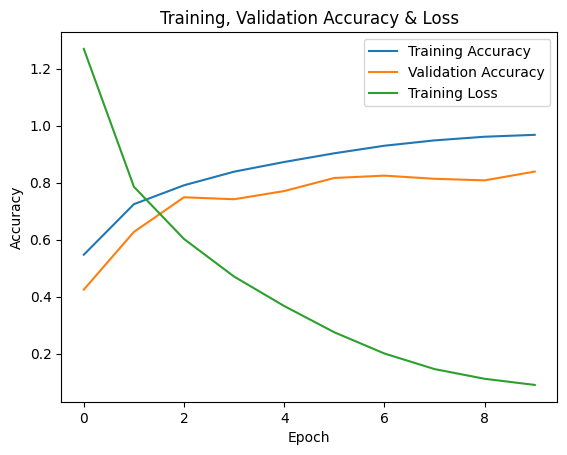

In [6]:
#Point 1. Plotting the training and validation accuracy curves over the 10 epochs of training,we add also Loss curve
training_accuracy = history.history['accuracy']
plt.plot(training_accuracy, label='Training Accuracy')
training_accuracy = history.history['val_accuracy']
plt.plot(training_accuracy, label='Validation Accuracy')
training_accuracy = history.history['loss']
plt.plot(training_accuracy, label='Training Loss')
plt.title('Training, Validation Accuracy & Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss'])
plt.show()



Compare the Training and Validation accuracy

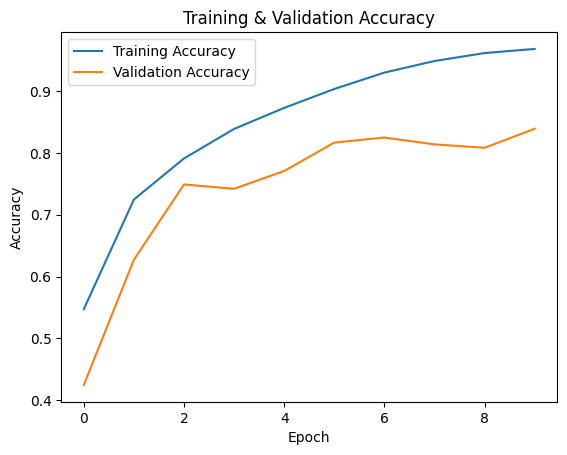

In [7]:
#Point 2 and 3. Compare accuracy in training and validation
training_accuracy = history.history['accuracy']
plt.plot(training_accuracy, label='Training Accuracy')
training_accuracy = history.history['val_accuracy']
plt.plot(training_accuracy, label='Validation Accuracy')

plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

What is the test accuracy of the ResNet model on the CIFAR-10 dataset.

In [8]:
#Point 3. Calculate the overall test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

print("If we compare the training and accuracy last item in the array, we can conclude the following:")

# Compare the final epoch accuracy
final_training_accuracy = training_accuracy[-1]
final_validation_accuracy = validation_accuracy[-1]

print(f"Final Training Accuracy: {final_training_accuracy}")
print(f"Final Validation Accuracy: {final_validation_accuracy}")

if final_validation_accuracy >= final_training_accuracy:
    print("The model's ability to generalize is good.")
else:
    print("The model may be overfitting to the training data.")



313/313 [==============================] - 5s 17ms/step - loss: 0.6311 - accuracy: 0.8390
If we compare the training and accuracy last item in the array, we can conclude the following:
Final Training Accuracy: 0.9679999947547913
Final Validation Accuracy: 0.8389999866485596
The model may be overfitting to the training data.


Plot five random example images from the test set with their predicted labels.

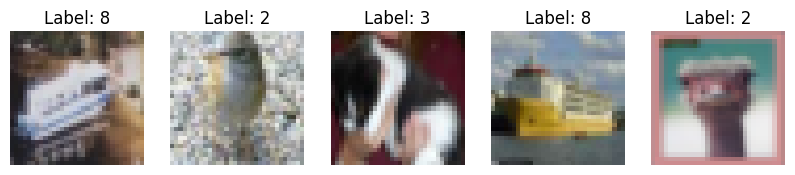

In [21]:
#Point 4

import random

# Select 5 random images
random_indices = random.sample(range(len(test_images)), 5)

# Plot the random images
plt.figure(figsize=(10, 5))
for i, index in enumerate(random_indices):
    image = test_images[index]
    label = test_labels[index][0]
    plt.subplot(1, 5, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Label: {label}")
plt.show()


Epoch 1/10
1563/1563 [==============================] - 104s 58ms/step - loss: 1.5750 - accuracy: 0.4373 - val_loss: 1.3111 - val_accuracy: 0.5407
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.9753 - accuracy: 0.6547 - val_loss: 0.8770 - val_accuracy: 0.6942
Epoch 3/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.7385 - accuracy: 0.7415 - val_loss: 2.2501 - val_accuracy: 0.3601
Epoch 4/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.5763 - accuracy: 0.8004 - val_loss: 0.6313 - val_accuracy: 0.7806
Epoch 5/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.4587 - accuracy: 0.8403 - val_loss: 0.6010 - val_accuracy: 0.8033
Epoch 6/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.3671 - accuracy: 0.8734 - val_loss: 0.7056 - val_accuracy: 0.7684
Epoch 7/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.2854 - accuracy: 0.8996 - val_loss: 0.6850 

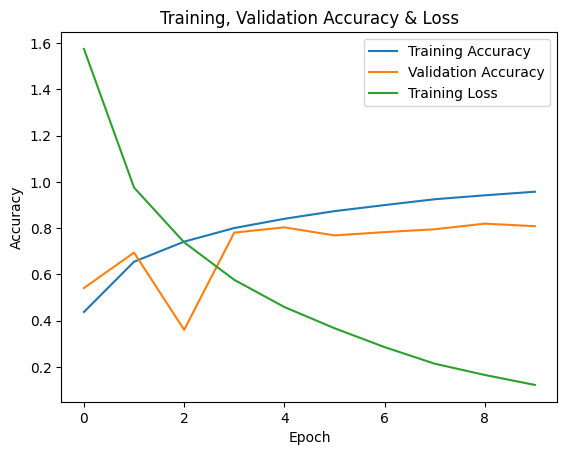

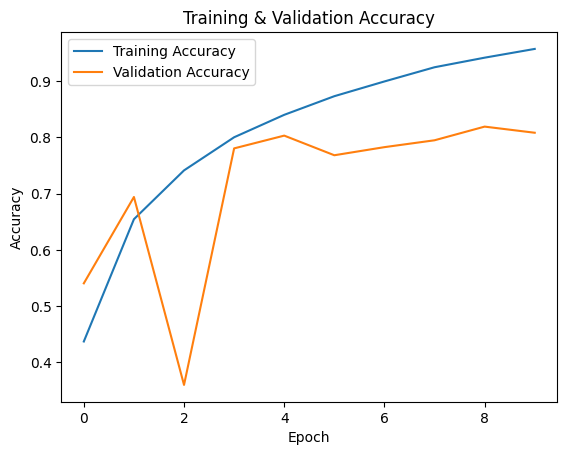

313/313 [==============================] - 5s 16ms/step - loss: 0.7387 - accuracy: 0.8084
If we compare the training and accuracy last item in the array, we can conclude the following:
Final Training Accuracy: 0.9574199914932251
Final Validation Accuracy: 0.8083999752998352
The model may be overfitting to the training data.


In [10]:
#Point 6

class ResNet(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = layers.Conv2D(64, (3, 3), padding='same', input_shape=train_images.shape[1:])
        self.bn1 = layers.BatchNormalization()
        self.layer1 = tf.keras.Sequential([
            ResidualBlock(64, 64),
            ResidualBlock(64, 64),
            ResidualBlock(64, 64)
        ])
        self.layer2 = tf.keras.Sequential([
            ResidualBlock(64, 128, stride=2),
            ResidualBlock(128, 128),
            ResidualBlock(128, 128)
        ])
        self.layer3 = tf.keras.Sequential([
            ResidualBlock(128, 256, stride=2),
            ResidualBlock(256, 256),
            ResidualBlock(256, 256)
        ])
        self.layer4 = tf.keras.Sequential([
            ResidualBlock(256, 512, stride=2),
            ResidualBlock(512, 512),
            ResidualBlock(512, 512)
        ])
        self.avgpool = layers.GlobalAveragePooling2D()
        self.fc = layers.Dense(num_classes, activation='softmax')
    def call(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = layers.ReLU()(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = self.fc(x)
        return x
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = layers.Conv2D(out_channels, (3, 3), strides=stride, padding='same', use_bias=False)
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(out_channels, (3, 3), strides=1, padding='same', use_bias=False)
        self.bn2 = layers.BatchNormalization()
        self.shortcut = tf.keras.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = tf.keras.Sequential([
                layers.Conv2D(out_channels, (1, 1), strides=stride, use_bias=False),
                layers.BatchNormalization()
            ])

    def call(self, x):
        residual = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = layers.ReLU()(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x += self.shortcut(residual)
        x = layers.ReLU()(x)
        return x

model = ResNet()
#model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.002), #additional try with specified learning rate, no important change sin the output.
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))




# Reuse of the plotting code in 1stplot
training_accuracy = history.history['accuracy']
plt.plot(training_accuracy, label='Training Accuracy')
training_accuracy = history.history['val_accuracy']
plt.plot(training_accuracy, label='Validation Accuracy')
training_accuracy = history.history['loss']
plt.plot(training_accuracy, label='Training Loss')
plt.title('Training, Validation Accuracy & Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss'])
plt.show()


training_accuracy = history.history['accuracy']
plt.plot(training_accuracy, label='Training Accuracy')
training_accuracy = history.history['val_accuracy']
plt.plot(training_accuracy, label='Validation Accuracy')

plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()


#we Calculate again the overall test accuracy (reuse from 1stplot)
test_loss, test_acc = model.evaluate(test_images, test_labels)

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

print("If we compare the training and accuracy last item in the array, we can conclude the following:")

# Compare the final epoch accuracy
final_training_accuracy = training_accuracy[-1]
final_validation_accuracy = validation_accuracy[-1]

print(f"Final Training Accuracy: {final_training_accuracy}")
print(f"Final Validation Accuracy: {final_validation_accuracy}")

if final_validation_accuracy >= final_training_accuracy:
    print("The model's ability to generalize is good.")
else:
    print("The model may be overfitting to the training data.")



# Loss Functions Comparison

In [ ]:
#Point 7


## Cross Entropy Loss

In [11]:
#for better comparison, we took the original code for the training, with the same optimizer and loss considerations.
model = ResNet()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 108s 59ms/step - loss: 1.3043 - accuracy: 0.5341 - val_loss: 1.5636 - val_accuracy: 0.4610
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7879 - accuracy: 0.7264 - val_loss: 0.8291 - val_accuracy: 0.7158
Epoch 3/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.5955 - accuracy: 0.7922 - val_loss: 0.8557 - val_accuracy: 0.7255
Epoch 4/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.4732 - accuracy: 0.8364 - val_loss: 0.8037 - val_accuracy: 0.7419
Epoch 5/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.3776 - accuracy: 0.8704 - val_loss: 0.6112 - val_accuracy: 0.8061
Epoch 6/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.2788 - accuracy: 0.9030 - val_loss: 0.6861 - val_accuracy: 0.7978
Epoch 7/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.2006 - accuracy: 0.9291 - val_loss: 0.6699 

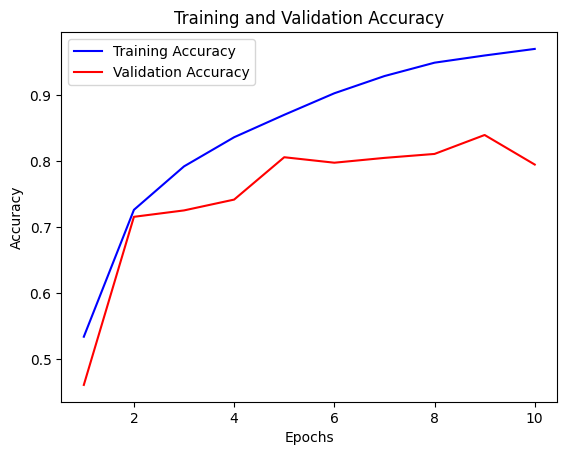

In [12]:
# Get training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy curves
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Hinge Loss

In [14]:
model = ResNet()
model.compile(optimizer='adam',
              loss='hinge',  # Hinge loss
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 109s 60ms/step - loss: 0.5666 - accuracy: 0.1010 - val_loss: 0.5560 - val_accuracy: 0.0998
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.5580 - accuracy: 0.0957 - val_loss: 0.5505 - val_accuracy: 0.1022
Epoch 3/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.5522 - accuracy: 0.1007 - val_loss: 0.5614 - val_accuracy: 0.1002
Epoch 4/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.5508 - accuracy: 0.0995 - val_loss: 0.5536 - val_accuracy: 0.0966
Epoch 5/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.5506 - accuracy: 0.1002 - val_loss: 0.5544 - val_accuracy: 0.0899
Epoch 6/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.5504 - accuracy: 0.0991 - val_loss: 0.5672 - val_accuracy: 0.0936
Epoch 7/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.5503 - accuracy: 0.1012 - val_loss: 0.5502 

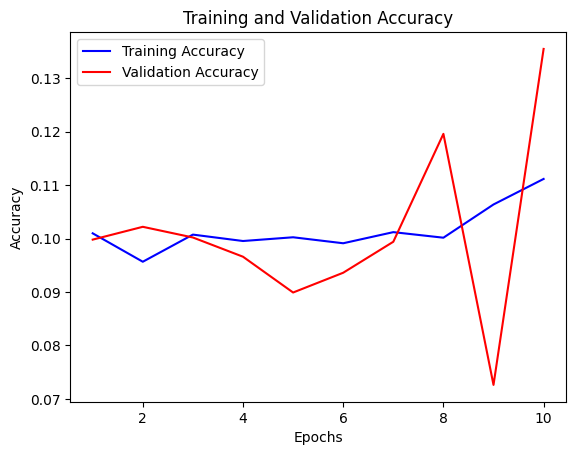

In [15]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy curves
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Different Regularizers

In [13]:
#Point 8


## Dropout regularizer

In [16]:
# ?????

class ResNet(tf.keras.Model):
    def __init__(self, num_classes=10, dropout_rate=0.2):
        super(ResNet, self).__init__()
        self.conv1 = layers.Conv2D(64, (3, 3), padding='same', input_shape=train_images.shape[1:])
        self.bn1 = layers.BatchNormalization()
        self.layer1 = tf.keras.Sequential([
            ResidualBlock(64, 64, dropout_rate=dropout_rate),
            ResidualBlock(64, 64, dropout_rate=dropout_rate),
            ResidualBlock(64, 64, dropout_rate=dropout_rate)
        ])
        self.layer2 = tf.keras.Sequential([
            ResidualBlock(64, 128, stride=2, dropout_rate=dropout_rate),
            ResidualBlock(128, 128, dropout_rate=dropout_rate),
            ResidualBlock(128, 128, dropout_rate=dropout_rate)
        ])
        self.layer3 = tf.keras.Sequential([
            ResidualBlock(128, 256, stride=2, dropout_rate=dropout_rate),
            ResidualBlock(256, 256, dropout_rate=dropout_rate),
            ResidualBlock(256, 256, dropout_rate=dropout_rate)
        ])
        self.layer4 = tf.keras.Sequential([
            ResidualBlock(256, 512, stride=2, dropout_rate=dropout_rate),
            ResidualBlock(512, 512, dropout_rate=dropout_rate),
            ResidualBlock(512, 512, dropout_rate=dropout_rate)
        ])
        self.avgpool = layers.GlobalAveragePooling2D()
        self.fc = layers.Dense(num_classes, activation='softmax')

    def call(self, x, training=False):
        x = self.conv1(x)
        x = self.bn1(x, training=training)
        x = layers.ReLU()(x)
        x = self.layer1(x, training=training)
        x = self.layer2(x, training=training)
        x = self.layer3(x, training=training)
        x = self.layer4(x, training=training)
        x = self.avgpool(x)
        x = self.fc(x)
        return x

class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, in_channels, out_channels, stride=1, dropout_rate=0.2):
        super(ResidualBlock, self).__init__()
        self.conv1 = layers.Conv2D(out_channels, (3, 3), strides=stride, padding='same', use_bias=False)
        self.bn1 = layers.BatchNormalization()
        self.dropout1 = layers.Dropout(dropout_rate)
        self.conv2 = layers.Conv2D(out_channels, (3, 3), strides=1, padding='same', use_bias=False)
        self.bn2 = layers.BatchNormalization()
        self.dropout2 = layers.Dropout(dropout_rate)
        self.shortcut = tf.keras.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = tf.keras.Sequential([
                layers.Conv2D(out_channels, (1, 1), strides=stride, use_bias=False),
                layers.BatchNormalization()
            ])

    def call(self, x, training=False):
        residual = x
        x = self.conv1(x)
        x = self.bn1(x, training=training)
        x = layers.ReLU()(x)
        x = self.dropout1(x, training=training)
        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = layers.ReLU()(x)
        x = self.dropout2(x, training=training)
        x += self.shortcut(residual, training=training)
        x = layers.ReLU()(x)
        return x

model = ResNet()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 133s 75ms/step - loss: 1.3786 - accuracy: 0.5084 - val_loss: 1.4081 - val_accuracy: 0.5436
Epoch 2/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.9022 - accuracy: 0.6858 - val_loss: 0.9778 - val_accuracy: 0.6760
Epoch 3/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.6951 - accuracy: 0.7581 - val_loss: 0.7488 - val_accuracy: 0.7480
Epoch 4/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.5616 - accuracy: 0.8065 - val_loss: 0.6236 - val_accuracy: 0.7868
Epoch 5/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.4720 - accuracy: 0.8369 - val_loss: 0.5772 - val_accuracy: 0.8060
Epoch 6/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.4002 - accuracy: 0.8626 - val_loss: 0.5637 - val_accuracy: 0.8093
Epoch 7/10
1563/1563 [==============================] - 117s 75ms/step - loss: 0.3317 - accuracy: 0.8836 - val_loss: 0

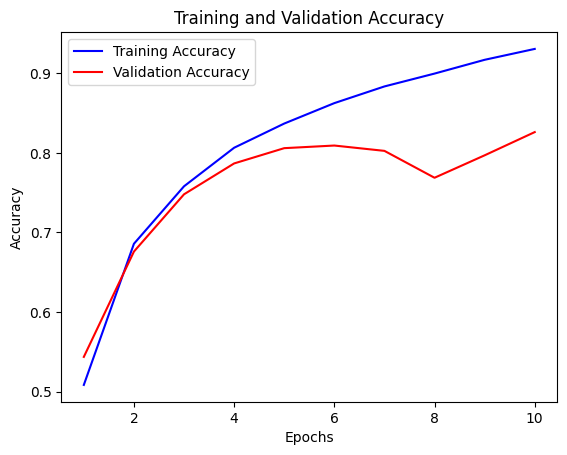

In [17]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy curves
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()